# Correr, el ejercicio más completo - C312

Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

## Cargar los datos

In [5]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['Id', 'TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Identificar las filas donde 'TotalSteps' es igual a 0 porque no nos interesan las personas que no corrieron nada
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()


Nuestro dataset tomado del sitio web *kaggle.com* describe en una carrera donde participaron corredores profesionales y personas promedio, los distintos momentos para cada uno según el nivel de intensidad al que corrieron, el tiempo que se tomaron para cada nivel de intensidad y la cantidad de calorias quemadas. Las variables estudiadas son:
- TotalSteps
- TotalDistance

- VeryActiveDistance
- ModeratelyActiveDistance
- LightActiveDistance
- SedentaryActiveDistance

- VeryActiveMinutes
- FairlyActiveMinutes
- LightlyActiveMinutes
- SedentaryMinutes

- Calories

Para un mejor análisis agregamos a nuestro dataset dos nuevas columnas:
- TotalMinutes: suma de las variables de tiempos de los distintos niveles de intensidad
- Velocidad: la tomamos como la velocidad media por cada observación, o sea, la distancia recorrida en total dividida por el tiempo total que anterirmente agregamos

In [3]:
import pandas as pd

# Añadir los minutos totales
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

# Añadir velocidad
df['Velocidad'] = df['TotalDistance'] / df['TotalMinutes']

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Velocidad
count,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000
mean,8078.963,5.792,1.551,0.597,3.543,0.002,21.768,14.348,205.692,951.506,2337.014,1193.314,0.005
std,4870.241,3.793,2.703,0.894,1.932,0.008,32.668,20.511,101.261,290.430,730.941,276.732,0.003
min,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,2.000,0.000
25%,4499.500,3.060,0.000,0.000,2.180,0.000,0.000,0.000,141.000,720.000,1848.500,981.000,0.003
50%,7640.000,5.410,0.320,0.270,3.530,0.000,5.000,8.000,206.000,1011.000,2202.000,1334.000,0.005
75%,10991.500,7.790,2.125,0.820,4.870,0.000,33.000,20.000,270.500,1189.000,2818.500,1440.000,0.007
max,36019.000,28.030,21.920,6.480,12.510,0.110,210.000,143.000,720.000,1440.000,4900.000,1440.000,0.019


## Mostrar histograma con los datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegúrate de que 'df' es tu DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [ ]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

TotalSteps tiene una distribucion con una cola menos pesada y asimetria moderada lo que sugiere que hay valores mas extremos y que la distribucion es mas pesada en la cola. VeryActiveDistance tiene una asimetria alta, lo que indica una distribucion mas asimetrica con mas valores en una cola de distribucion que en la otra.

### Test de Normalidad

In [8]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

TotalSteps
D = 1.0
p-value = 0.0

TotalDistance
D = 0.8531965779014188
p-value = 1.5531914282144926e-83

VeryActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

ModeratelyActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

LightActiveDistance
D = 0.7797274269459824
p-value = 8.043282031560495e-65

SedentaryActiveDistance
D = 0.5
p-value = 1.213143437181786e-23

VeryActiveMinutes
D = 0.5599683287581669
p-value = 4.484460215825491e-30

FairlyActiveMinutes
D = 0.6486501019683699
p-value = 1.3137348433656183e-41

LightlyActiveMinutes
D = 0.9899683287581669
p-value = 2.743841982214976e-200

SedentaryMinutes
D = 1.0
p-value = 0.0

Calories
D = 1.0
p-value = 0.0

TotalMinutes
D = 1.0
p-value = 0.0

Velocidad
D = 0.500024933893617
p-value = 1.206257825512482e-23



La discrepancia entre los resultados de la prueba de Kolmogorov-Smirnov (K-S) y las medidas de kurtosis y asimetría puede surgir debido a varias razones. La kurtosis y la asimetría son medidas estadísticas que describen la forma de la distribución de una variable, pero no son suficientes por sí solas para determinar si una distribución es normal. La normalidad es una propiedad compleja que se refiere a la forma específica de la distribución, y la K-S es una prueba no paramétrica que evalúa la similitud entre la distribución empírica de una muestra y una distribución teórica (en este caso, la distribución normal).

### K-S vs. Kurtosis y Asimetría

- **K-S**: Esta prueba es sensible a la ubicación y la escala de la distribución, pero no a su forma. Por lo tanto, puede detectar diferencias significativas entre la distribución empírica y la normal, incluso si la kurtosis y la asimetría son similares.

- **Kurtosis y Asimetría**: Estas medidas describen la forma de la distribución, pero no son suficientes para determinar si una distribución es normal. La normalidad se refiere a la forma específica de la distribución, que es plana y simétrica.

### Interpretación de los Resultados

- **K-S**: Un valor p extremadamente bajo (como el que has proporcionado) indica que la distribución de `SedentaryActiveDistance` es significativamente diferente de la distribución normal.

- **Kurtosis y Asimetría**: Si estas medidas indican que la distribución de `SedentaryActiveDistance` se acerca a la normal, es posible que la diferencia entre la distribución empírica y la normal no sea suficientemente grande para ser detectada por la K-S, especialmente si la muestra es grande.

### Conclusión

La discrepancia entre los resultados de la K-S y las medidas de kurtosis y asimetría sugiere que, aunque la distribución de por ejmplo `SedentaryActiveDistance` puede parecer normal en términos de kurtosis y asimetría, hay diferencias significativas en su forma que la hacen diferente de la distribución normal. Esto puede ser importante dependiendo del contexto y del propósito del análisis. Por ejemplo, si estás utilizando métodos estadísticos que asumen normalidad, es posible que necesites considerar transformaciones de los datos o utilizar métodos no paramétricos que no requieran la suposición de normalidad.

## Predecir Calorias

Puede la cantida de calorías que quema una persona al correr depender linealmente de la distancia y el tiempo que le toma para distintos niveles de intensidad?

Para dar respuesta a ello vamos a usar un modelo de regresión lineal donde seleccionaremos algunas de nuestras variables para intentar predecir las calorias, pero para ello es necesario analizar cuidadosamente qué variables tomaremos.

Vamos a observar por medio de los siguientes gráficos como se comportan las calorias según el resto de nuestras variables

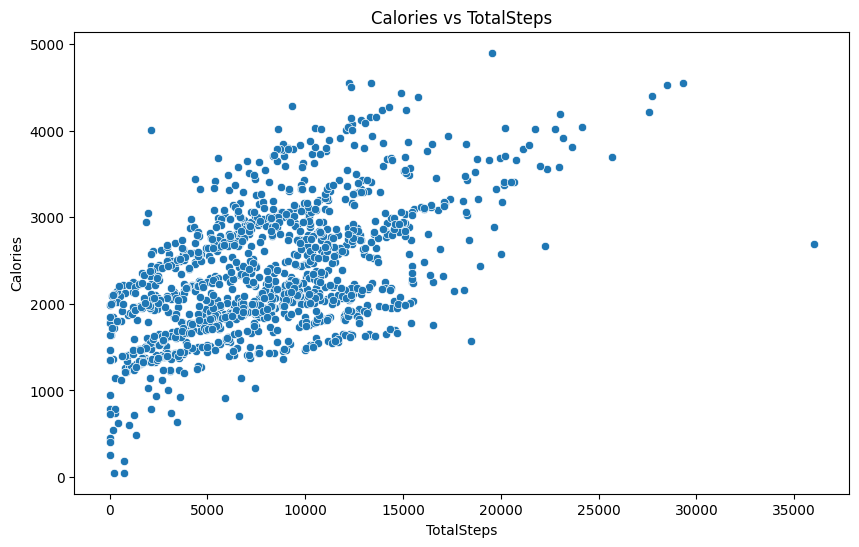

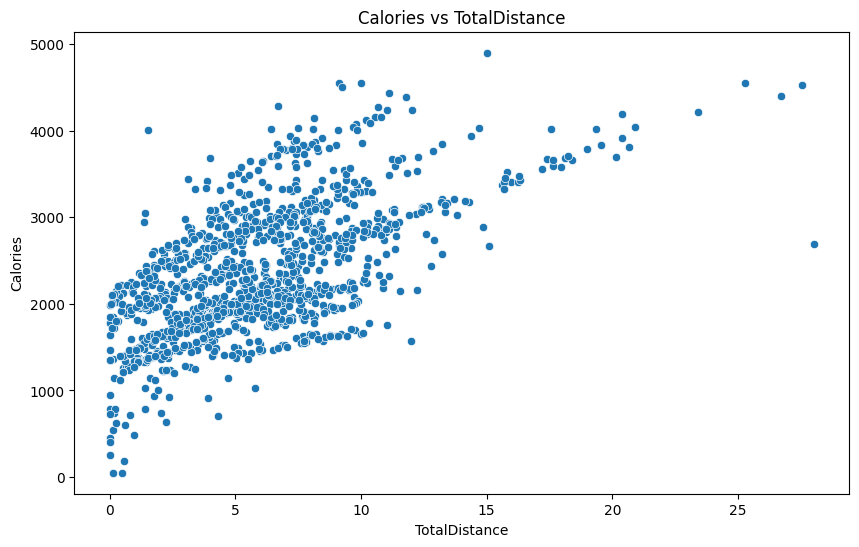

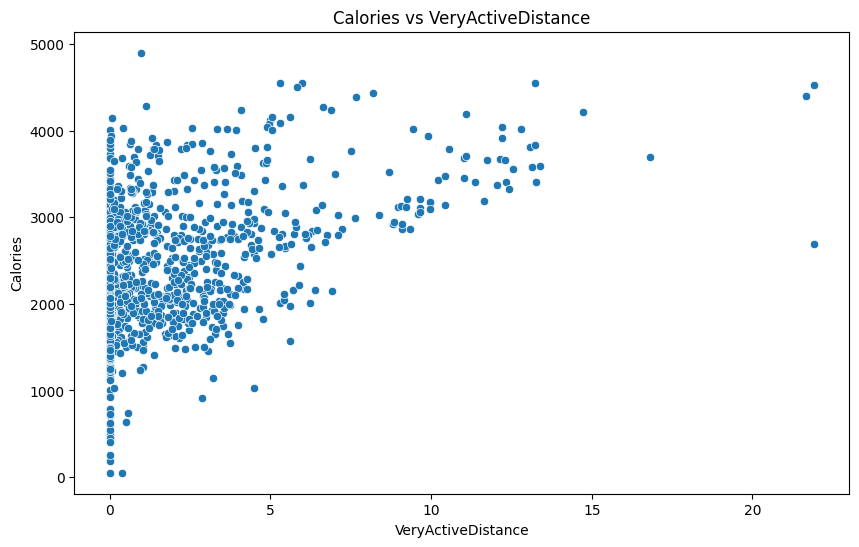

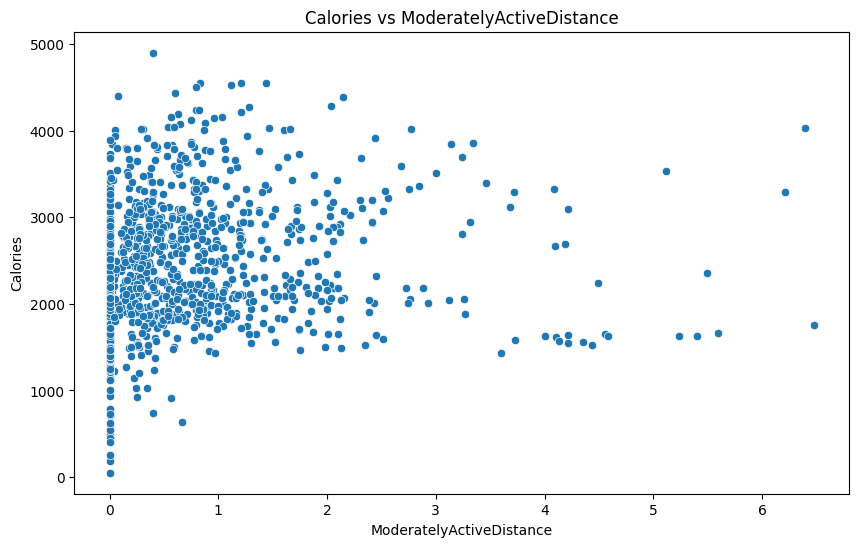

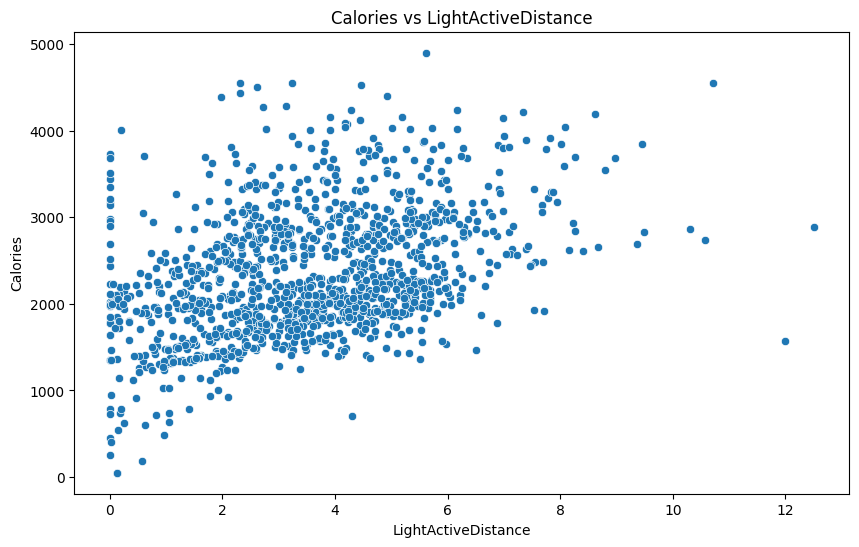

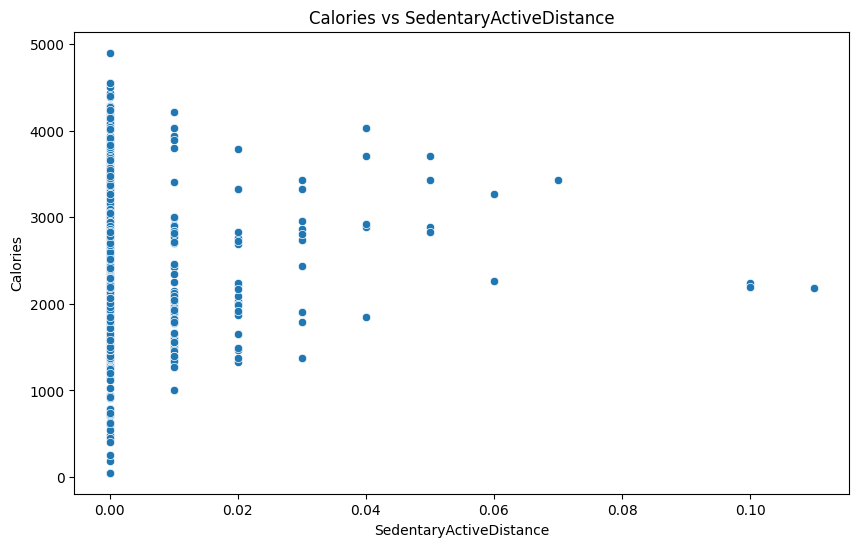

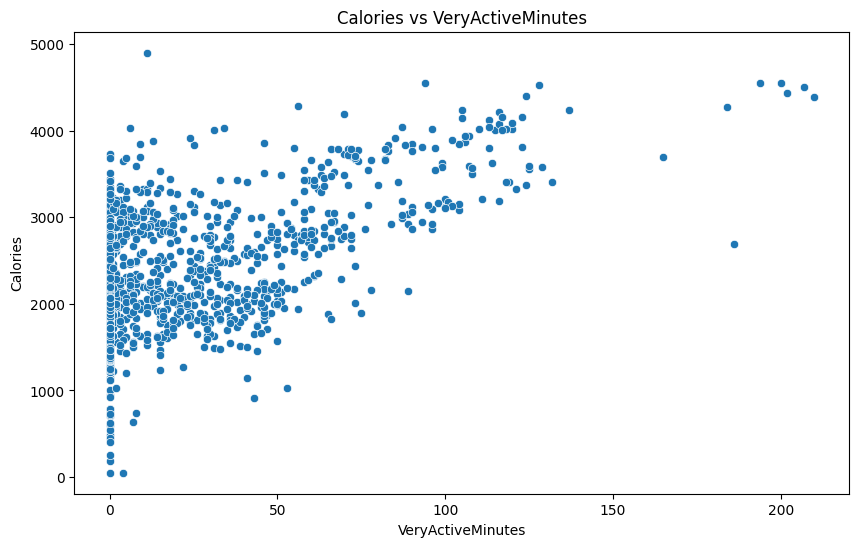

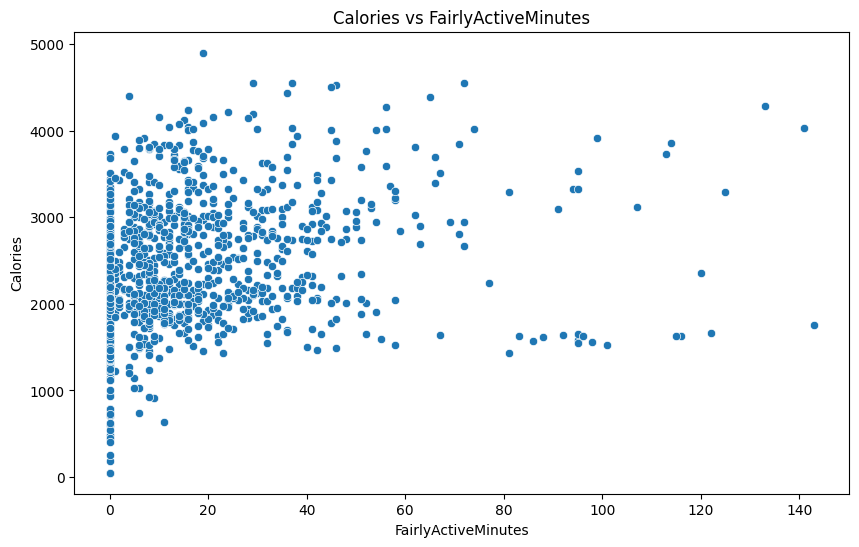

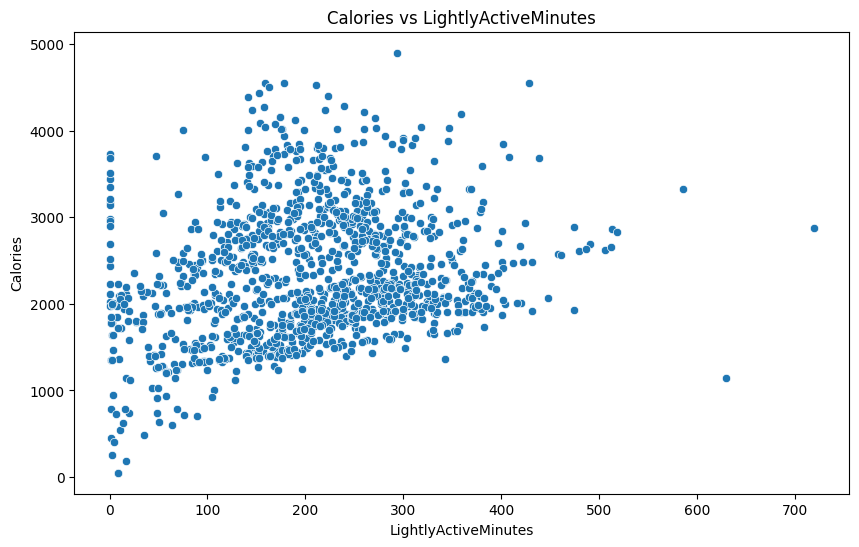

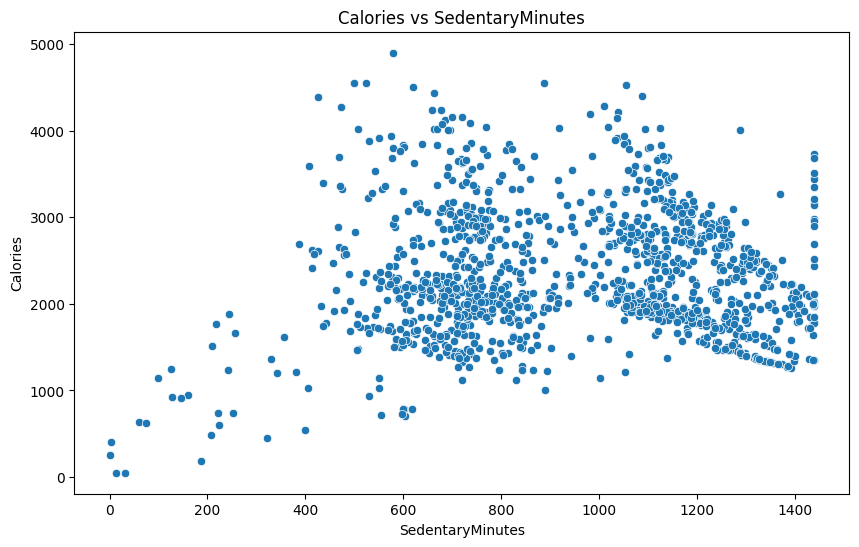

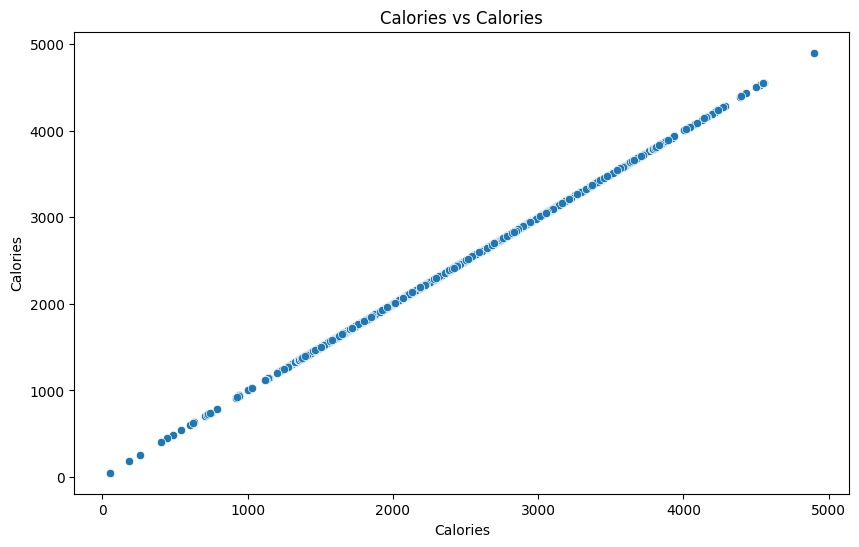

In [8]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

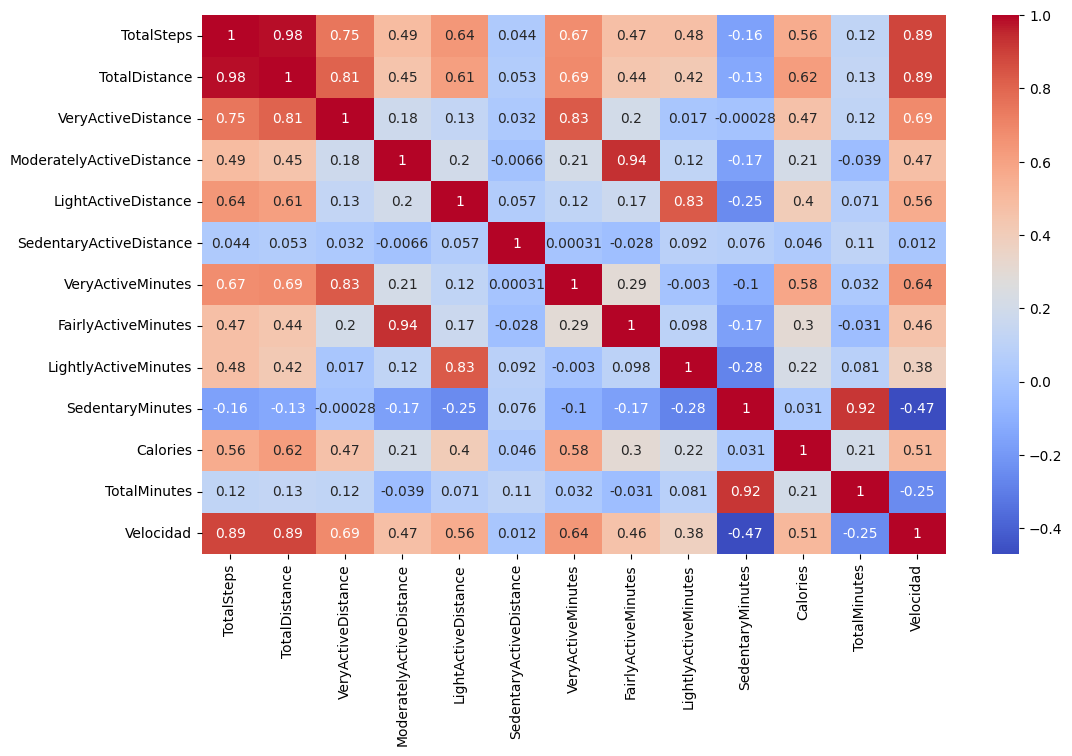

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

### Modelo 1

Vamos a hacer el análisis con todas las variables para intentar predecir Calorías

In [9]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.19e-284
Time:                        10:07:25   Log-Likelihood:                -7409.5
No. Observations:                1007   AIC:                         1.484e+04
Df Residuals:                     996   BIC:                         1.490e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [11]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 135438.67855833995
Coeficiente de Determinación R^2: 0.6943213111544373


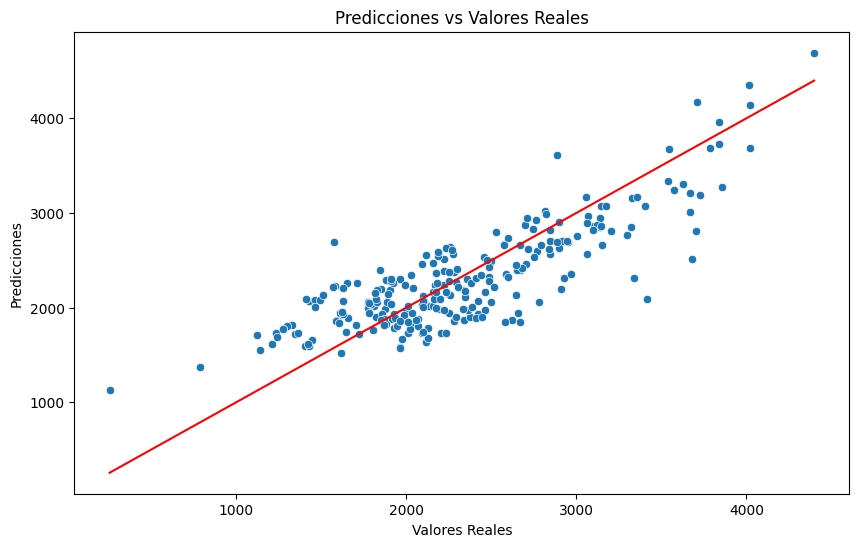

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como observamos anteriormente en los resultados de **model.summary()** vemos que hay una variable cuyo $P > |t|$ es mayor que 0.05, lo cual indica que no es significativa en el modelo y puede llevar a errores en el resultado. Por lo que hagamos otro modelo pero esta vez eliminandola.

### Modelo 2

Eliminemos `SedentaryActiveDistance` de nuestro conjunto de entrenamiento

In [13]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('SedentaryActiveDistance', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     317.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.57e-285
Time:                        10:14:07   Log-Likelihood:                -7409.6
No. Observations:                1007   AIC:                         1.484e+04
Df Residuals:                     997   BIC:                         1.489e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [15]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 134974.8425158403
Coeficiente de Determinación R^2: 0.695368167154657


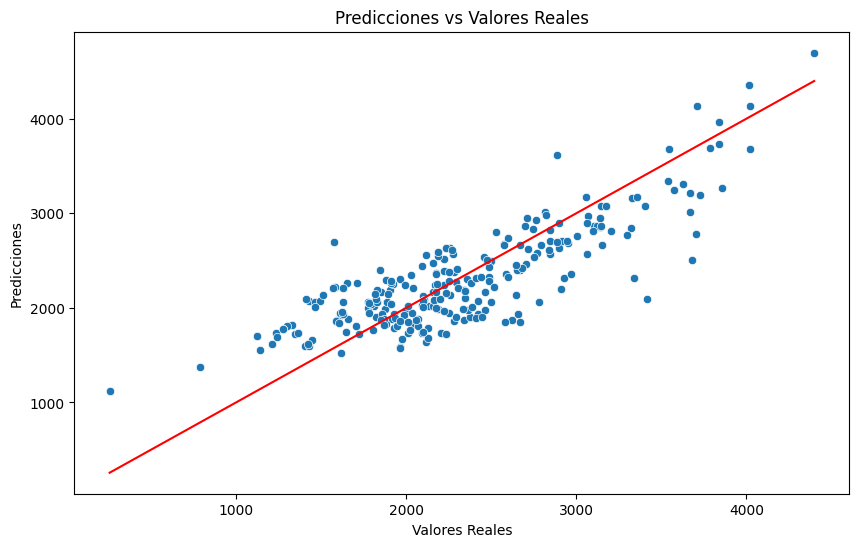

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como podemos observar los resultados fueron un poco mejores, sin embargo en la descripción de los resultados del modelo, a pesar que solucionamos quedarnos con variables significativas segun su $P > |t|$ vemos que hay un *warning* al final que nos indica que el número de la condición es muy grande, lo que podría sugerir problemas de multicolinealidad. Esto significa que algunas de las variables independientes están altamente correlacionadas entre sí, lo que puede hacer que los coeficientes sean inestables y difíciles de interpretar.

### Modelo 3

Vamos a intentar ahora según la información proporcionada por la matriz de correlación eliminar variables que tengan entre ellas una fuerte dependencia para intentar minimizar la multicolinealidad

- Si tenemos la distancia total recorrida vamos a eliminar el total de pasos dados
- Entre la distancia recorrida con alta intensidad y los minutos demorados en esa intensidad existe una alta correlación, por lo cual nos quedaremos con la variable que tenga mayor correlación con calorías, en este caso con los minutos, por lo que eliminamos la distancia a alta intensidad.
- Lo anterior ocurre también con la intensidad media
- En el caso de la intensidad ligera nos quedaremos con la distancia porque tiene mayor correlación con las calorías

In [17]:
print(column_names)

['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


In [18]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('SedentaryActiveDistance', axis=1)
X = X.drop('TotalSteps', axis=1)
X = X.drop('VeryActiveDistance', axis=1)
X = X.drop('ModeratelyActiveDistance', axis=1)
X = X.drop('LightlyActiveMinutes', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.64e-157
Time:                        10:40:41   Log-Likelihood:                -7718.6
No. Observations:                1007   AIC:                         1.545e+04
Df Residuals:                    1001   BIC:                         1.548e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 997.6148    

In [20]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 283386.31239623716
Coeficiente de Determinación R^2: 0.36041050213918635


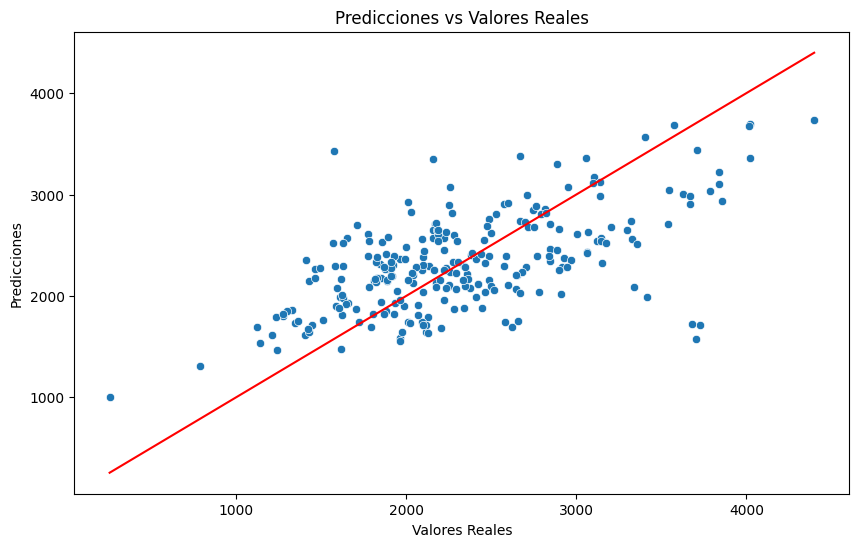

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Vemos en los resultados del modelo que `TotalDistance` ahora tiene un valor no deseado en la columna $P > |t|$ por lo cual efectuemos otro modelo eliminando esta variable

### Modelo 4

In [26]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('SedentaryActiveDistance', axis=1)
X = X.drop('TotalSteps', axis=1)
X = X.drop('VeryActiveDistance', axis=1)
X = X.drop('ModeratelyActiveDistance', axis=1)
X = X.drop('LightlyActiveMinutes', axis=1)
X = X.drop('TotalDistance', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     273.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.00e-158
Time:                        10:56:38   Log-Likelihood:                -7718.7
No. Observations:                1007   AIC:                         1.545e+04
Df Residuals:                    1002   BIC:                         1.547e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1001.1142    

In [28]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 282562.2336696377
Coeficiente de Determinación R^2: 0.36227040883152717


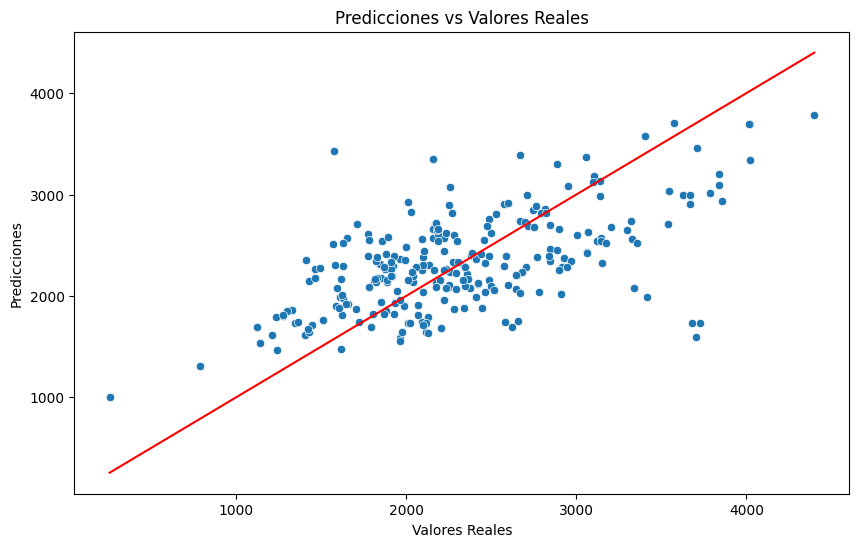

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

## Análisis de residuos

### Code

In [30]:
residuos = model.resid

In [31]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -4.2086031889985015e-11
La media de los residuos es cero.
Suma de los residuos: -4.238063411321491e-08
La suma de los residuos no es cero.


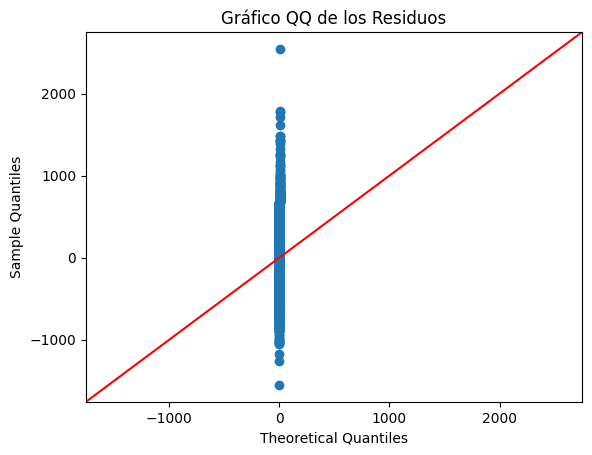

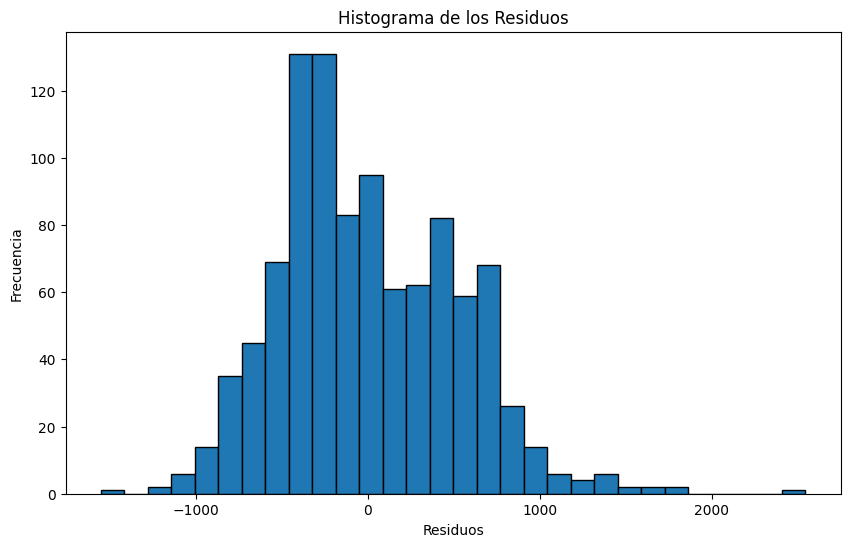

In [32]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Como vemos los residuos del modelo no siguen una distribución normal, esto puede tener varias implicaciones:

- Inferencias estadísticas: Muchos métodos estadísticos, incluyendo la regresión lineal y ANOVA, asumen que los residuos son normalmente distribuidos. Si esta suposición se viola, las inferencias estadísticas (como los intervalos de confianza y las pruebas de hipótesis) que se basan en el modelo pueden no ser válidas.
- Eficiencia del modelo: Un modelo con residuos no normales puede no ser el modelo más eficiente para los datos. Es posible que exista otro modelo que se ajuste mejor a estos.
- Violación de otros supuestos: Los residuos no normales a menudo indican que se están violando otros supuestos del modelo. Por ejemplo, podrían sugerir que la relación entre las variables no es lineal, o que la varianza de los residuos no es constante (heterocedasticidad).

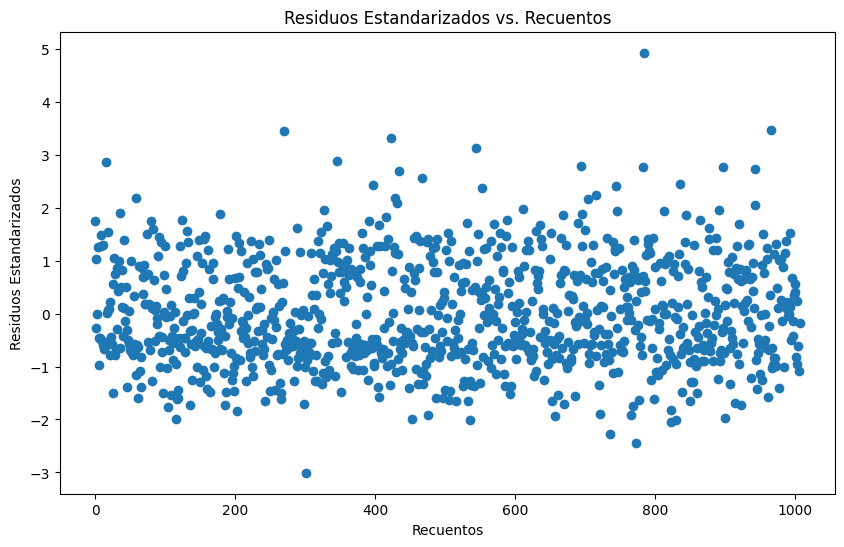

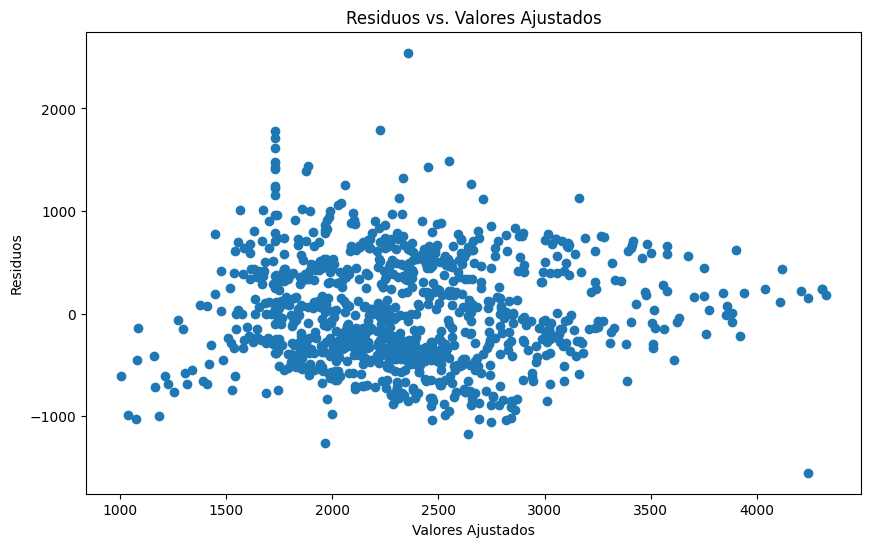

[('Lagrange multiplier statistic', 33.38075489745592), ('p-value', 9.981556569168241e-07), ('f-value', 8.588448866304), ('f p-value', 8.145113612459078e-07)]


In [33]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [34]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.5451835216872466, p-value = 3.8013423429597666e-281
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo 4

Los residuos no están normalmente distribuidos

## PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [37]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns 

Index(['TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [39]:
# Aplicando PCA
pca = PCA()
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

[[ 0.49248911 -0.07499242 -0.1970304  ...  0.06963527  0.16287691
  -0.07342628]
 [ 3.2208785   0.68893996 -0.73688261 ... -0.14931814  0.30255676
  -0.13482305]
 [ 1.33945979  0.0382827  -0.95036687 ... -0.03560797  0.1918918
  -0.06499183]
 ...
 [ 0.94436785 -0.55749055 -0.76158847 ...  0.11962329 -0.08545348
   0.01750677]
 [ 5.83099302  2.26929105 -2.64462152 ...  0.45161994 -0.3559999
   0.15113033]
 [-0.44720883  0.00887715 -0.53806142 ...  0.1512494  -0.06306893
   0.05119101]]


A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 42.89%
Componente principal 2: 16.47%
Componente principal 3: 14.35%
Componente principal 4: 9.51%
Componente principal 5: 7.74%
Componente principal 6: 5.13%
Componente principal 7: 1.90%
Componente principal 8: 1.21%
Componente principal 9: 0.46%
Componente principal 10: 0.31%
Componente principal 11: 0.04%

Varianza acumulada:
Hasta el componente principal 1: 42.89%
Hasta el componente principal 2: 59.36%
Hasta el componente principal 3: 73.71%
Hasta el componente principal 4: 83.22%
Hasta el componente principal 5: 90.95%
Hasta el componente principal 6: 96.08%
Hasta el componente principal 7: 97.98%
Hasta el componente principal 8: 99.19%
Hasta el componente principal 9: 99.65%
Hasta el componente principal 10: 99.96%
Hasta el componente principal 11: 100.00%


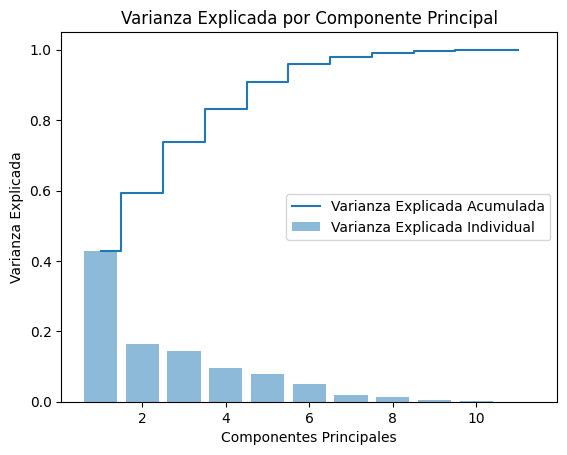

In [42]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Como podemos observar, las componente a partir de la 6ta explican muy poco los datos, por lo que para nuestro proyecto tomaremos solo 6 componentes, con lo cual estaríamos abarcando un 96% de los datos.

Se realiza un análisis de los componentes principales y para cada uno se identifican las características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.


In [44]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)


# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]
principal_component3 = principal_components.iloc[2]
principal_component4 = principal_components.iloc[3]
principal_component5 = principal_components.iloc[4]
principal_component6 = principal_components.iloc[5]


# Valores maximos absolutos de cada componente
max1 = principal_component1.abs().nlargest(1).values
max2 = principal_component2.abs().nlargest(1).values
max3 = principal_component3.abs().nlargest(1).values
max4 = principal_component4.abs().nlargest(1).values
max5 = principal_component5.abs().nlargest(1).values
max6 = principal_component6.abs().nlargest(1).values


# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(principal_component1.size).index
print("Las características más importantes para el componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    if abs(principal_component1[characteristic]) > max1/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(principal_component2.size).index
print("\nLas características más importantes para el componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    if abs(principal_component2[characteristic]) > max2/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC3)
pc3_characteristics = principal_component3.abs().nlargest(principal_component3.size).index
print("\nLas características más importantes para el componente principal (PC3) son:")
for i, characteristic in enumerate(pc3_characteristics, start=1):
    if abs(principal_component3[characteristic]) > max3/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC4)
pc4_characteristics = principal_component4.abs().nlargest(principal_component4.size).index
print("\nLas características más importantes para el componente principal (PC4) son:")
for i, characteristic in enumerate(pc4_characteristics, start=1):
    if abs(principal_component4[characteristic]) > max4/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC5)
pc5_characteristics = principal_component5.abs().nlargest(principal_component5.size).index
print("\nLas características más importantes para el componente principal (PC5) son:")
for i, characteristic in enumerate(pc5_characteristics, start=1):
    if abs(principal_component5[characteristic]) > max5/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC6)
pc6_characteristics = principal_component2.abs().nlargest(principal_component6.size).index
print("\nLas características más importantes para el componente principal (PC6) son:")
for i, characteristic in enumerate(pc6_characteristics, start=1):
    if abs(principal_component6[characteristic]) > max6/2:
        print(f"{i}. {characteristic}")


Las características más importantes para el componente principal (PC1) son:
1. TotalSteps
2. TotalDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. Calories
6. LightActiveDistance
7. FairlyActiveMinutes
8. ModeratelyActiveDistance

Las características más importantes para el componente principal (PC2) son:
1. LightlyActiveMinutes
2. LightActiveDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. SedentaryMinutes

Las características más importantes para el componente principal (PC3) son:
1. ModeratelyActiveDistance
2. FairlyActiveMinutes

Las características más importantes para el componente principal (PC4) son:
1. SedentaryActiveDistance
2. SedentaryMinutes

Las características más importantes para el componente principal (PC5) son:
1. SedentaryMinutes
2. SedentaryActiveDistance

Las características más importantes para el componente principal (PC6) son:
6. Calories


Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

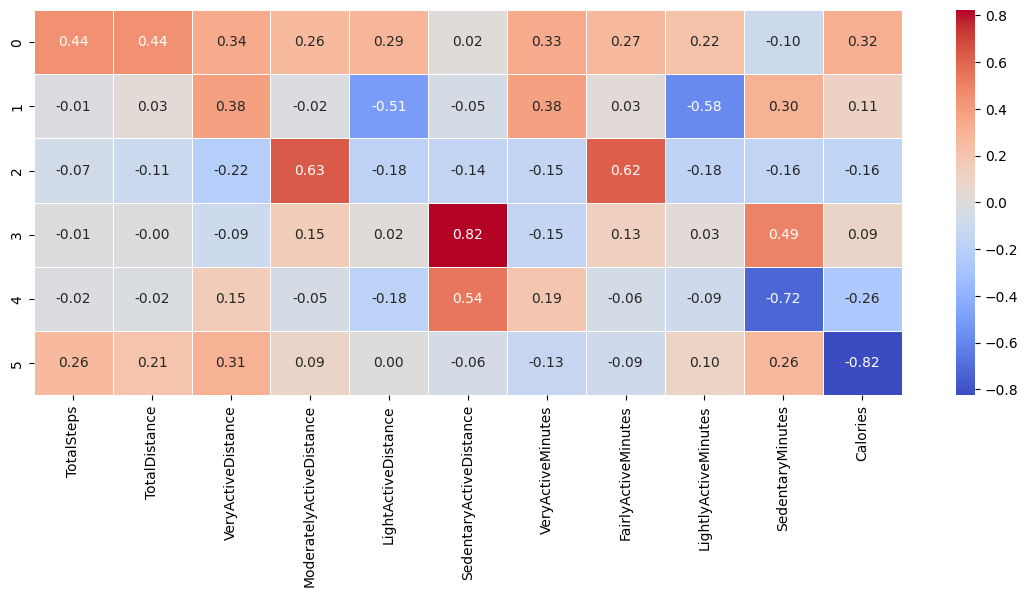

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de calor con seaborn
plt.figure(figsize=(14, 5)) 
sns.heatmap(principal_components[:6], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Mostrar la tabla de calor
plt.show()